In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
col = [
    'gender','age_range','head_size','brain_weight'
]
df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/brainhead.dat',delimiter=" ",names=col,skipinitialspace=True)

Apakah ada perbedaan brain weight per age range?

### Jawaban:

In [3]:
df

,gender,age_range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   gender        237 non-null    int64
 1   age_range     237 non-null    int64
 2   head_size     237 non-null    int64
 3   brain_weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
df.describe()

,gender,age_range,head_size,brain_weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [6]:
# Mendeskripsikan semua data per features (kolom)
list_item = []
for column in df.columns:
    list_item.append([column, df[column].dtype, df[column].isnull().sum(),
                     round(df[column].isnull().sum()/len(df),2), df[column].nunique(), 
                      df[column].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='features dtype null null% nunique unique_sample'.split())
desc_df

,features,dtype,null,null%,nunique,unique_sample
0,gender,int64,0,0.0,2,"[1, 2]"
1,age_range,int64,0,0.0,2,"[1, 2]"
2,head_size,int64,0,0.0,221,"[4512, 3738, 4261, 3777]"
3,brain_weight,int64,0,0.0,146,"[1530, 1297, 1335, 1282]"


In [7]:
by_age_range = df.groupby('age_range')
df_ar_desc = by_age_range.describe()['brain_weight']
df_ar_desc

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
1,110.0,1304.736364,116.409959,1027.0,1227.5,1301.0,1370.75,1635.0
2,127.0,1263.937008,120.925712,955.0,1180.0,1250.0,1332.50,1620.0


In [8]:
# Membuat grup untuk unique nya age_range
for i in df.columns.tolist():
    display(by_age_range[i].value_counts())

age_range  gender
1          1         57
           2         53
2          1         77
           2         50
Name: gender, dtype: int64

age_range  age_range
1          1            110
2          2            127
Name: age_range, dtype: int64

age_range  head_size
1          3497         2
           3804         2
           2857         1
           3071         1
           3082         1
                       ..
2          4204         1
           4253         1
           4381         1
           4442         1
           4488         1
Name: head_size, Length: 229, dtype: int64

age_range  brain_weight
1          1340            4
           1350            4
           1280            3
           1400            3
           1127            2
                          ..
2          1485            1
           1510            1
           1560            1
           1588            1
           1620            1
Name: brain_weight, Length: 175, dtype: int64

In [9]:
df_ar1 = df[df['age_range']==1]
display(df_ar1.head())
display(len(df_ar1))

,gender,age_range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


110

In [10]:
df_ar2 = df[df['age_range']==2]
display(df_ar2.head())
display(len(df_ar2))

,gender,age_range,head_size,brain_weight
57,1,2,4166,1560
58,1,2,3935,1330
59,1,2,3669,1222
60,1,2,3866,1415
61,1,2,3393,1175


127

In [11]:
df_ar1['brain_weight'] == df_ar1['brain_weight']
# df_ar1['brain_weight'] == df_ar2['brain_weight']

0      True
1      True
2      True
3      True
4      True
       ... 
182    True
183    True
184    True
185    True
186    True
Name: brain_weight, Length: 110, dtype: bool

### Visualisasi

In [12]:
df.head()

,gender,age_range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


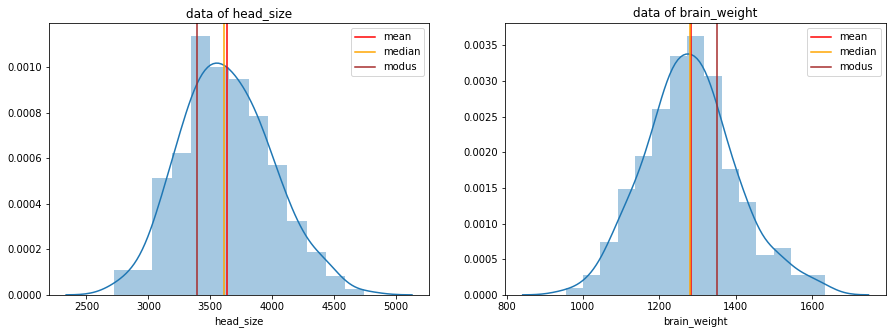

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('data of head_size')
sns.distplot(df['head_size'])
plt.axvline(df['head_size'].mean(), color='r', label='mean')
plt.axvline(df['head_size'].median(), color='orange', label='median')
plt.axvline(df['head_size'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(122)
plt.title('data of brain_weight')
sns.distplot(df['brain_weight'])
plt.axvline(df['brain_weight'].mean(), color='r', label='mean')
plt.axvline(df['brain_weight'].median(), color='orange', label='median')
plt.axvline(df['brain_weight'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show()

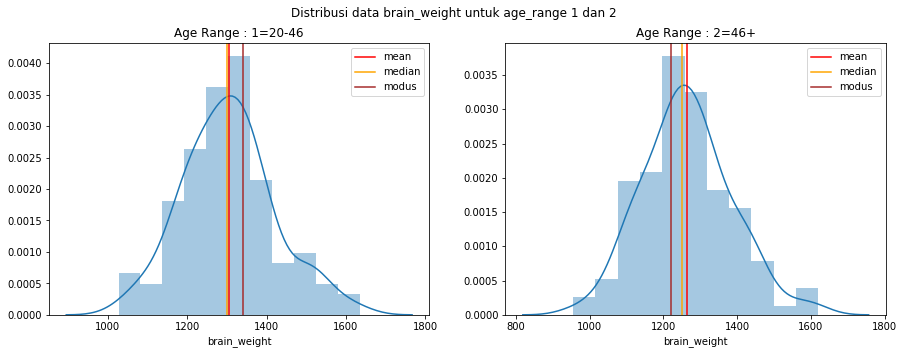

In [14]:
plt.figure(figsize=(15,5))
plt.suptitle('Distribusi data brain_weight untuk age_range 1 dan 2')

plt.subplot(121)
plt.title('Age Range : 1=20-46')
sns.distplot(df_ar1['brain_weight'])
plt.axvline(df_ar1['brain_weight'].mean(), color='r', label='mean')
plt.axvline(df_ar1['brain_weight'].median(), color='orange', label='median')
plt.axvline(df_ar1['brain_weight'].mode()[0], color='brown', label='modus')
plt.legend()

plt.subplot(122)
plt.title('Age Range : 2=46+')
sns.distplot(df_ar2['brain_weight'])
plt.axvline(df_ar2['brain_weight'].mean(), color='r', label='mean')
plt.axvline(df_ar2['brain_weight'].median(), color='orange', label='median')
plt.axvline(df_ar2['brain_weight'].mode()[0], color='brown', label='modus')
plt.legend()

plt.show() # Grafik ini menunjukkan perbedaan distribusi data brain weight per age range

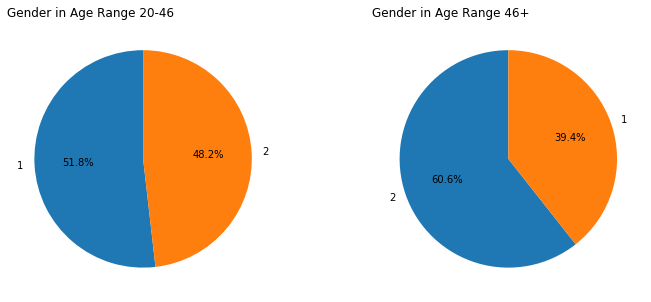

age_range  gender
1          1         57
           2         53
2          1         77
           2         50
Name: gender, dtype: int64

In [15]:
# Menggambarkan nilai rasio Gender per Age Range dengan Pie-Chart
labels_g1 = by_age_range['gender'].value_counts().index[1]
labels_g2 = by_age_range['gender'].value_counts().index[2]
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Gender in Age Range 20-46', loc='left')
plt.pie(by_age_range['gender'].value_counts(normalize=True)[1], labels=labels_g1, autopct='%1.1f%%', startangle=90)

plt.subplot(122)
plt.title('Gender in Age Range 46+', loc='left')
plt.pie(by_age_range['gender'].value_counts(normalize=True)[2], labels=labels_g2, autopct='%1.1f%%', startangle=90)

plt.show()

display(by_age_range['gender'].value_counts())

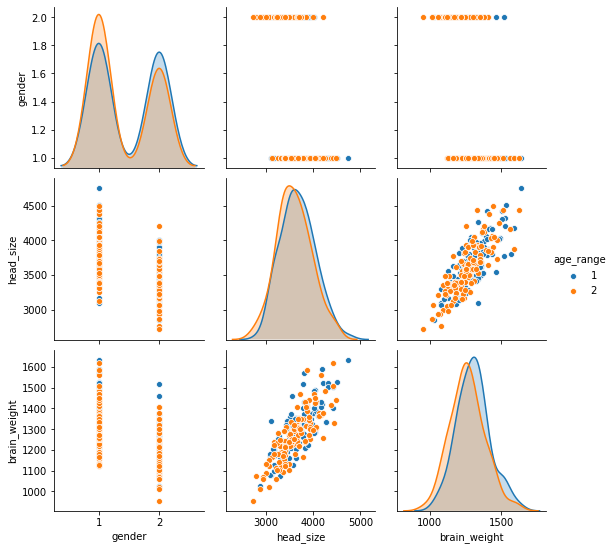

In [16]:
sns.pairplot(df, hue='age_range')

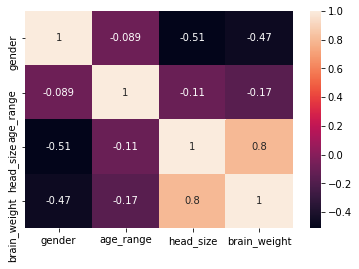

In [17]:
sns.heatmap(df.corr(), annot=True)

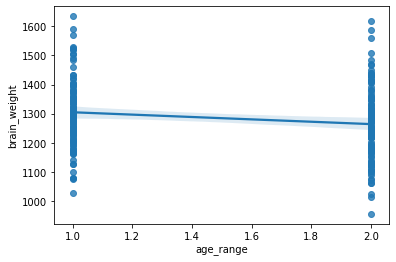

In [18]:
sns.regplot(df['age_range'], df['brain_weight'])

**Apakah ada perbedaan brain weight per age range?**

Iya ada perbedaan brain weight per age range, karena:
- Dataframe df_ar_desc menunjukkan perbedaan nilai count, mean, std, min, 25%, 50%, 75%, max dari feature 'brain_weight' per age range (pada unique age range).
- Nilai dari Dataframe df_ar1 dan df_ar2 berbeda.
- Grafik dari Pairplot di feature brain_weight per age_range tidak sama.